# Contextual bandits and Bayesian Thomposon Sampling Algorithms

In this Jupyter Notebook, we will code two variants of BTS with Gaussian linear model 

1. Bayesian Thompson Sampling
2. Bayesian Thompson Sampling V2 (with exact posterior probability computation)



## Environment Setup and Imports

Let's start by importing the required libraries and setting up the environment.


In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Define utility functions
def pplot(ax=None):
    if ax is None:
        plt.grid(True, alpha=0.5)
        axoff(plt.gca())
    else:
        ax.grid(True, alpha=0.5)
        axoff(ax)
    return

def axoff(ax, keys=['top', 'right']):
    for k in keys:
        ax.spines[k].set_visible(False)
    return

## Bandit Environment and Algorithm Classes

Next, let's define the BanditEnvironment class and the classes for different bandit algorithms.


In [10]:
class ContextualBanditEnvironment:
    def __init__(self, num_arms, num_features, true_params):
        self.num_arms = num_arms
        self.num_features = num_features
        self.true_params = true_params # True parameters for each arm
    
    def pull_arm(self, arm, state):
        reward = np.dot(self.true_params[arm], state) + NOISE_STD * np.random.randn()
        return(reward)


In [11]:
class GaussianLinearModel:
    def __init__(self, num_features, weights, covariance, noise_variance):
        self.num_features = num_features
        self.mean_params = weights  
        self.covariance = covariance 
        self.noise_variance = noise_variance 
    
    def sample_weights(self):
        ''' This generates weights using the mean and the covariance'''
        return(np.random.multivariate_normal(self.mean_params, self.covariance))
    
    def update(self, reward, state):
        precision = np.linalg.inv(self.covariance)
        posterior_precision = precision + np.outer(state, state) / NOISE_STD**2
        posterior_covariance = np.linalg.inv(posterior_precision)
        posterior_mean = np.dot(posterior_covariance, np.dot(precision, self.mean_params) + reward * state / self.noise_variance)
        self.mean_params = posterior_mean
        self.covariance = posterior_covariance


class BayesianThompsonSampling:
    def __init__(self, num_arms, num_features, prior_means, prior_variances, arm_variances):
        self.num_arms = num_arms
        self.num_features = num_features
        self.arm_models = [GaussianLinearModel(num_features, prior_means[arm], prior_variances[arm], arm_variances[arm]) for arm in range(num_arms)]
        self.arm_variances = arm_variances
    
    ## %%%%%%% EXERCISE 1-----YOU WILL WRITE CODE HERE %%%%%%% 
    def select_arm(self, state):
        ''' IMPLEMENT THIS CODE to select arm in Thompson sampling. 
        Your code should involve generating some random variables directly and taking some maxima.
        Your code should return the sampled arm.'''
    ## %%%%%%% UNTIL HERE %%%%%%% 

    def update(self, arm, reward, state):
        self.arm_models[arm].update(reward, state)


class BayesianThompsonSamplingV2:
    def __init__(self, num_arms, num_features, prior_means, prior_variances, arm_variances):
        self.num_arms = num_arms
        self.num_features = num_features
        self.arm_models = [GaussianLinearModel(num_features, prior_means[arm], prior_variances[arm], arm_variances[arm]) for arm in range(num_arms)]
        self.arm_variances = arm_variances
       
    ## %%%%%%% EXERCISE 2-----YOU WILL WRITE CODE HERE %%%%%%% 
    def select_arm(self, state):
        ''' IMPLEMENT THIS CODE. Your code should involve computing some probability and then generating
       the arm directly. Your code should return the probability of sampling arm 1, and the sampled arm.'''
    ## %%%%%%% UNTIL HERE %%%%%%% 
    
    def update(self, arm, reward, state):
        self.arm_models[arm].update(reward, state)

#### %%%%%%% YOU WILL EDIT THIS CELL AT SOME POINT %%%%%%% 

In [12]:
class BayesianThompsonSampling:
    def __init__(self, num_arms, num_features, prior_means, prior_variances, arm_variances):
        self.num_arms = num_arms
        self.num_features = num_features
        self.arm_models = [GaussianLinearModel(num_features, prior_means[arm], prior_variances[arm], arm_variances[arm]) for arm in range(num_arms)]
        self.arm_variances = arm_variances
    
    def select_arm(self):
        ''' IMPLEMENT THIS CODE to select an arm in Thompson sampling. 
        Your code should involve generating some random variables directly and taking some maxima.
        Your code should return the sampled arm.'''
        
    def update(self, arm, reward):
        ''' IMPLEMENT THIS CODE to update the means and variance in Thompson sampling.
         Your code should involve updating some mean and variances; and loading them back in
         self.prior_means and self.prior_variances'''

class BayesianThompsonSamplingV2:
    def __init__(self, num_arms, num_features, prior_means, prior_variances, arm_variances):
        self.num_arms = num_arms
        self.num_features = num_features
        self.arm_models = [GaussianLinearModel(num_features, prior_means[arm], prior_variances[arm], arm_variances[arm]) for arm in range(num_arms)]
        self.arm_variances = arm_variances

    def select_arm(self):
        '''IMPLEMENT THIS CODE. Your code should involve computing some probability and then generating
        the arm directly. Your code should return the probability of sampling arm 1, and the sampled arm.'''
    
    def update(self, arm, reward):
        '''IMPLEMENT THIS CODE to update the means and variance in Thompson sampling.
         Your code should involve updating some mean and variances; and loading them back in
         self.prior_means and self.prior_variances'''


## Algorithm Comparison

Now, let's compare the performance of different algorithms in the bandit environment.


#### %%%%%%% YOU WILL EDIT THIS CELL AT SOME POINT %%%%%%% 

In [18]:
## %%%%%%% YOU WILL EDIT CODE HERE %%%%%%% 
# np.random.seed(1000)
np.random.seed(100)
EVAL_BTS = False # CHANGE THIS TO True when you finish EXERCISE 1 / Editing BTS code.
EVAL_BTSV2 = False # CHANGE THIS TO True when you finish EXERCISE 2 / Editing BTSV2 code.
## %%%%%%% UNTIL HERE %%%%%%% 


NUM_ARMS  = 2
NUM_FEATURES  = 2
TRUE_PARAMS = np.array(([1., 0.5], [0.5, 1])) #[1, 0.5] is arm 0's parameter
NOISE_STD = 1. # (Gaussian) noise std in rewards
NOISE_STD_EST = 1.

assert(TRUE_PARAMS.shape[0]==NUM_ARMS)
assert(TRUE_PARAMS.shape[1]==NUM_FEATURES)

### Parameters

In [19]:


num_arms = NUM_ARMS
num_features = NUM_FEATURES
num_rounds = 1000
prior_means = np.zeros((num_arms, num_features))
prior_variances = np.array((np.eye(num_features), np.eye(num_features)))
arm_variances = NOISE_STD_EST**2 * np.ones(num_arms)



### Create Bandit environment and algs


In [20]:

bandit_env = ContextualBanditEnvironment(num_arms, num_features, TRUE_PARAMS)
true_params = bandit_env.true_params


algs = []
if EVAL_BTS:
    bts = BayesianThompsonSampling(num_arms, num_features, prior_means, prior_variances, arm_variances)
    algs.append(('Bayes. Thomp. Sampling', bts))
if EVAL_BTSV2:
    btsv2 = BayesianThompsonSamplingV2(num_arms, num_features, prior_means, prior_variances, arm_variances)
    algs.append(('Bayes. Thomp. Sampling V2', btsv2))
    p_bts2 = np.zeros(num_rounds) # probabilities of selecting arm



In [21]:
# Create an empty dictionary to store results for each alg
results = {alg: {
    'chosen_arms': np.zeros(num_rounds, dtype=int),
    'rewards': np.zeros(num_rounds),
    'cumulative_rewards': np.zeros(num_rounds),
    'cumulative_regret': np.zeros(num_rounds),
    'cumulative_pulls': np.zeros(num_rounds)
} for alg, _ in algs}

states = np.zeros((num_rounds,num_features))
true_rewards = np.vstack([states @ true_params[0], states @ true_params[1]]).T
optimal_arms = np.zeros(num_rounds, dtype=int)
for t in range(num_rounds):
    for alg, alg_obj in algs:
        # Generate a random state/context
        states[t] = np.random.randn(num_features)
        true_rewards[t] = true_params @ states[t]
        optimal_arms[t] = np.argmax(true_rewards[t])

        # Select arm using the alg
        if alg == "Bayes. Thomp. Sampling V2":
            p_bts2[t], chosen_arm = alg_obj.select_arm(states[t])
        else:
            chosen_arm = alg_obj.select_arm(states[t])

        results[alg]['chosen_arms'][t] = chosen_arm
        
        # Pull arm and get reward
        reward = bandit_env.pull_arm(chosen_arm, states[t])
        results[alg]['rewards'][t] = reward

        # Update arm model
        alg_obj.update(chosen_arm, reward, states[t])

        # Calculate cumulative rewards using the relation
        results[alg]['cumulative_rewards'][t] = results[alg]['cumulative_rewards'][t-1] + reward if t > 0 else reward
        
        # Calculate cumulative regret using the relation
        regret = np.max(true_rewards[t]) - true_rewards[t, chosen_arm]
        results[alg]['cumulative_regret'][t] = results[alg]['cumulative_regret'][t-1] + regret  if t > 0 else regret
        
        # Calculate cumulative pulls
        results[alg]['cumulative_pulls'][t] = (results[alg]['cumulative_pulls'][t-1]*t + (chosen_arm == optimal_arms[t]))/(t+1) if t>0 else chosen_arm == optimal_arms[t]


# Plot cumulative rewards, cumulative regret, and number of pulls for each algorithm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


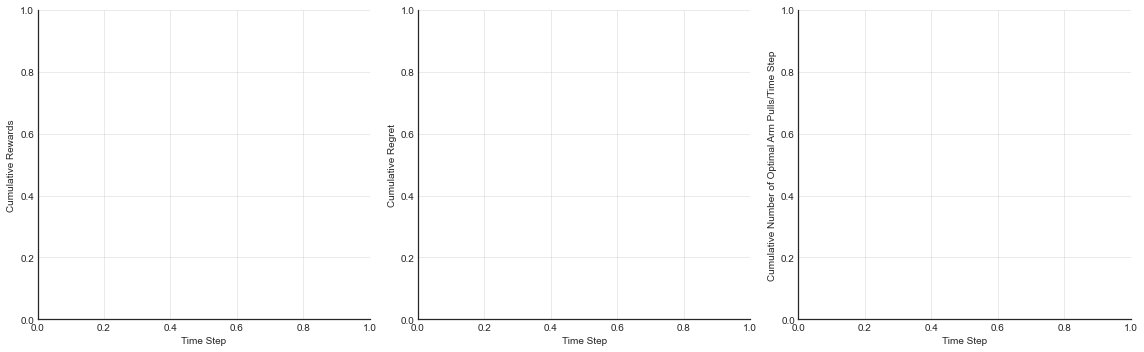

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs = axs.flatten()

for alg, data in results.items():

    axs[0].plot(range(num_rounds), data['cumulative_rewards'], label=alg)
    axs[1].plot(range(num_rounds), data['cumulative_regret'], label=alg)
    axs[2].plot(range(num_rounds), data['cumulative_pulls'], label=alg)


axs[0].set_ylabel("Cumulative Rewards")
axs[0].legend()

axs[1].set_ylabel("Cumulative Regret")
# axs[1].legend()

axs[2].set_ylabel("Cumulative Number of Optimal Arm Pulls/Time Step")
# axs[2].legend()

for j in range(3):
    axs[j].set_xlabel("Time Step")
    pplot(axs[j])
plt.tight_layout()
plt.show()



## Questions

1. What would happen to the regrets of different algorithms if we:
   - Reduce the separation between the two arms?
   - Increase noise variance in rewards?
   - Noise variance estimate was wrong?
   - Increase the number of rounds?
2. BONUS: Try to empirically check the scaling rate of regret with the number of decision times using a Log-scale and least squares fit.
3. Play around with random seeds and other problem parameters. Try something fun and creative. If you find something interesting, share it with us!